In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
!pip install xgboost
import xgboost as xgb


from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\train (1).csv")

In [3]:
df

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

# DATA CLEANİNG

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [6]:
df.tail()

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [7]:
df.sample()

datetime  season  holiday  workingday  weather   temp  \
6005  2012-02-06 11:00:00       1        0           1        1  10.66   

       atemp  humidity  windspeed  casual  registered  count  
6005  13.635        70     8.9981      12         104    116

In [8]:
df.describe().T

count        mean         std   min      25%      50%       75%  \
season      10886.0    2.506614    1.116174  1.00   2.0000    3.000    4.0000   
holiday     10886.0    0.028569    0.166599  0.00   0.0000    0.000    0.0000   
workingday  10886.0    0.680875    0.466159  0.00   0.0000    1.000    1.0000   
weather     10886.0    1.418427    0.633839  1.00   1.0000    1.000    2.0000   
temp        10886.0   20.230860    7.791590  0.82  13.9400   20.500   26.2400   
atemp       10886.0   23.655084    8.474601  0.76  16.6650   24.240   31.0600   
humidity    10886.0   61.886460   19.245033  0.00  47.0000   62.000   77.0000   
windspeed   10886.0   12.799395    8.164537  0.00   7.0015   12.998   16.9979   
casual      10886.0   36.021955   49.960477  0.00   4.0000   17.000   49.0000   
registered  10886.0  155.552177  151.039033  0.00  36.0000  118.000  222.0000   
count       10886.0  191.574132  181.144454  1.00  42.0000  145.000  284.0000   

                 max  
season        4.0000  
holiday       1.0000  
workingday    1.0000  
weather       4.0000  
temp         41.0000  
atemp        45.4550  
humidity    100.0000  
windspeed    56.9969  
casual      367.0000  
registered  886.0000  
count       977.0000

In [9]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [12]:
for i in df.select_dtypes(exclude="object"):   
    fig=px.box(df, y=i)
    fig.show()

In [13]:
def outliers(melumat):
    for col in melumat.columns:
        if melumat[col].dtype=="int64" or df[col].dtype=="float64":                
            q1=melumat[col].quantile(0.25)
            q3=melumat[col].quantile(0.75)           
            IQR=q3-q1
            lower_limit=q1-IQR*1.5      
            
            upper_limit=q3+IQR*1.5            
            melumat[col]=np.where(melumat[col]>=upper_limit,upper_limit,np.where(melumat[col]<=lower_limit,lower_limit,melumat[col]))

In [14]:
outliers(df) 

In [15]:
for i in df.select_dtypes(exclude="object"):   
    fig=px.box(df, y=i)
    fig.show()

In [16]:
holiday_counts = df["holiday"].value_counts()
print(holiday_counts)

holiday
0.0    10886
Name: count, dtype: int64


In [17]:
df.drop("holiday", axis=1, inplace=True)
df.drop("casual", axis=1, inplace=True)
df.drop("registered", axis=1, inplace=True)

In [18]:
df

datetime  season  workingday  weather   temp   atemp  \
0      2011-01-01 00:00:00     1.0         0.0      1.0   9.84  14.395   
1      2011-01-01 01:00:00     1.0         0.0      1.0   9.02  13.635   
2      2011-01-01 02:00:00     1.0         0.0      1.0   9.02  13.635   
3      2011-01-01 03:00:00     1.0         0.0      1.0   9.84  14.395   
4      2011-01-01 04:00:00     1.0         0.0      1.0   9.84  14.395   
...                    ...     ...         ...      ...    ...     ...   
10881  2012-12-19 19:00:00     4.0         1.0      1.0  15.58  19.695   
10882  2012-12-19 20:00:00     4.0         1.0      1.0  14.76  17.425   
10883  2012-12-19 21:00:00     4.0         1.0      1.0  13.94  15.910   
10884  2012-12-19 22:00:00     4.0         1.0      1.0  13.94  17.425   
10885  2012-12-19 23:00:00     4.0         1.0      1.0  13.12  16.665   

       humidity  windspeed  count  
0          81.0     0.0000   16.0  
1          80.0     0.0000   40.0  
2          80.0     0.0000   32.0  
3          75.0     0.0000   13.0  
4          75.0     0.0000    1.0  
...         ...        ...    ...  
10881      50.0    26.0027  336.0  
10882      57.0    15.0013  241.0  
10883      61.0    15.0013  168.0  
10884      61.0     6.0032  129.0  
10885      66.0     8.9981   88.0  

[10886 rows x 9 columns]

In [19]:
df["datetime"] = pd.to_datetime(df["datetime"])

                                 
min_date = df["datetime"].min()
max_date = df["datetime"].max()

print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")

Minimum date: 2011-01-01 00:00:00
Maximum date: 2012-12-19 23:00:00


In [20]:
start_train = pd.to_datetime("2011-03-01")
end_train = pd.to_datetime("2011-05-01")
train_df = df[(df["datetime"] >= start_train) & (df["datetime"] <= end_train)]
test_df = df[(df["datetime"] < start_train) | (df["datetime"] > end_train)]

print(f"Number of rows in train data: {train_df.shape[0]}")
print(f"Number of rows in test data: {test_df.shape[0]}")

Number of rows in train data: 902
Number of rows in test data: 9984


In [21]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["year"] = df["datetime"].dt.year 
df["month"] = df["datetime"].dt.month 
df["day"] = df["datetime"].dt.day 
df["dayofweek"] = df["datetime"].dt.dayofweek 
df["hour"] = df["datetime"].dt.hour 

In [22]:
df["temp"].unique()  

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [23]:
df

datetime  season  workingday  weather   temp   atemp  \
0     2011-01-01 00:00:00     1.0         0.0      1.0   9.84  14.395   
1     2011-01-01 01:00:00     1.0         0.0      1.0   9.02  13.635   
2     2011-01-01 02:00:00     1.0         0.0      1.0   9.02  13.635   
3     2011-01-01 03:00:00     1.0         0.0      1.0   9.84  14.395   
4     2011-01-01 04:00:00     1.0         0.0      1.0   9.84  14.395   
...                   ...     ...         ...      ...    ...     ...   
10881 2012-12-19 19:00:00     4.0         1.0      1.0  15.58  19.695   
10882 2012-12-19 20:00:00     4.0         1.0      1.0  14.76  17.425   
10883 2012-12-19 21:00:00     4.0         1.0      1.0  13.94  15.910   
10884 2012-12-19 22:00:00     4.0         1.0      1.0  13.94  17.425   
10885 2012-12-19 23:00:00     4.0         1.0      1.0  13.12  16.665   

       humidity  windspeed  count  year  month  day  dayofweek  hour  
0          81.0     0.0000   16.0  2011      1    1          5     0  
1          80.0     0.0000   40.0  2011      1    1          5     1  
2          80.0     0.0000   32.0  2011      1    1          5     2  
3          75.0     0.0000   13.0  2011      1    1          5     3  
4          75.0     0.0000    1.0  2011      1    1          5     4  
...         ...        ...    ...   ...    ...  ...        ...   ...  
10881      50.0    26.0027  336.0  2012     12   19          2    19  
10882      57.0    15.0013  241.0  2012     12   19          2    20  
10883      61.0    15.0013  168.0  2012     12   19          2    21  
10884      61.0     6.0032  129.0  2012     12   19          2    22  
10885      66.0     8.9981   88.0  2012     12   19          2    23  

[10886 rows x 14 columns]

In [24]:
print(df.dtypes)

datetime      datetime64[ns]
season               float64
workingday           float64
weather              float64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
count                float64
year                   int32
month                  int32
day                    int32
dayofweek              int32
hour                   int32
dtype: object


In [25]:
df = df.astype({"datetime": "object", "count": "float64"})

In [26]:
df["count_lag1"] = df["count"].shift(1)
df["count_lag2"] = df["count"].shift(2)
df["count_lag3"] = df["count"].shift(3)
df["count_lag4"] = df["count"].shift(4)
df["count_lag5"] = df["count"].shift(5)
df["count_lag6"] = df["count"].shift(6)
df["count_lag7"] = df["count"].shift(7)

In [27]:
print(df.dtypes)

datetime       object
season        float64
workingday    float64
weather       float64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
count         float64
year            int32
month           int32
day             int32
dayofweek       int32
hour            int32
count_lag1    float64
count_lag2    float64
count_lag3    float64
count_lag4    float64
count_lag5    float64
count_lag6    float64
count_lag7    float64
dtype: object


# DATA VİSUALİZATİON

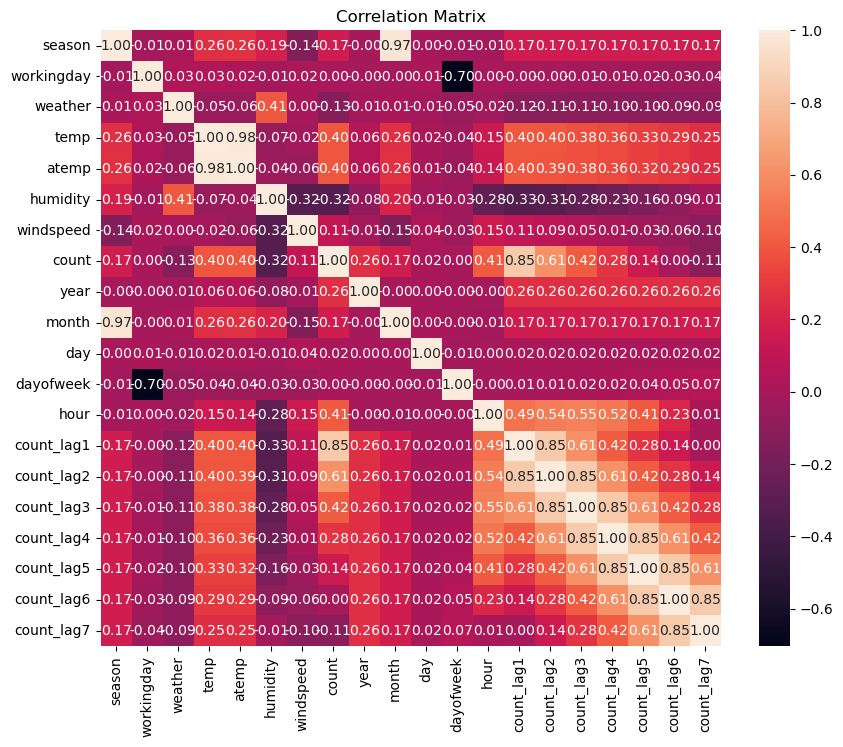

In [28]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

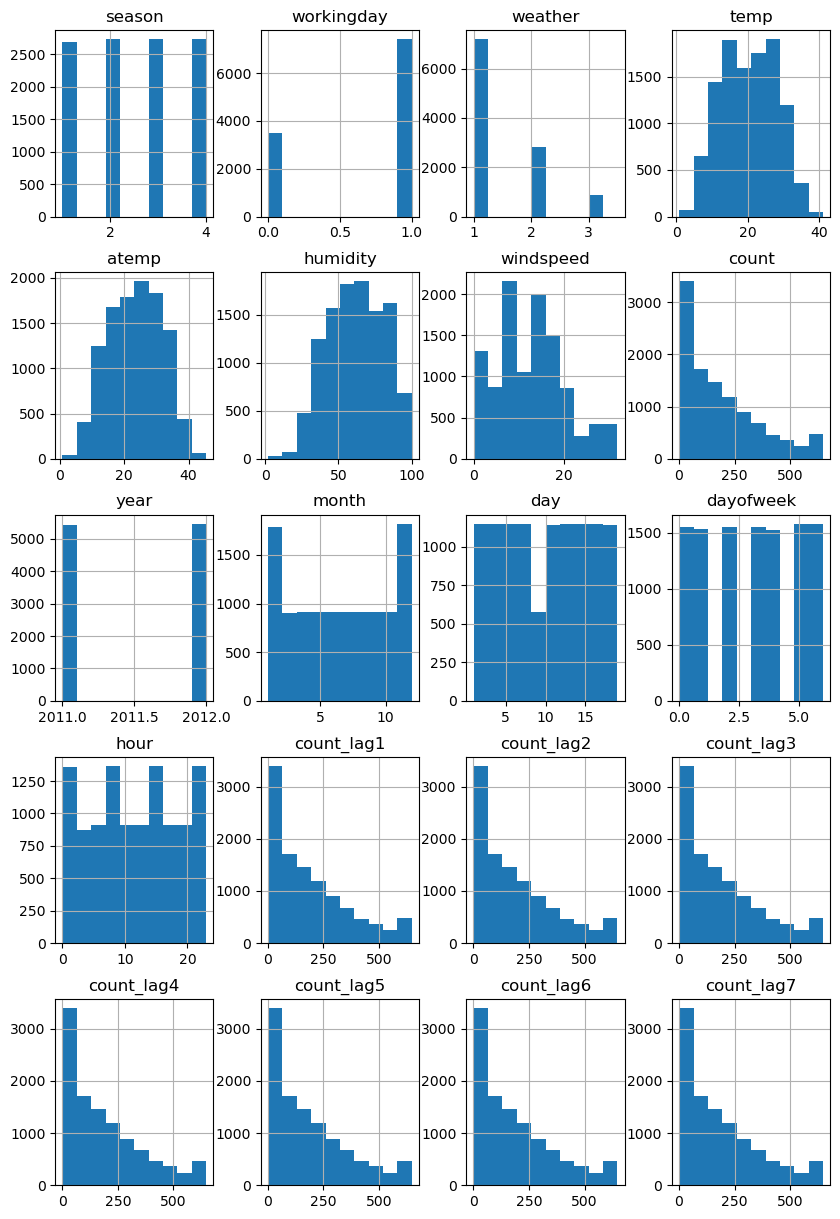

In [29]:
df.hist(figsize=(10,15));

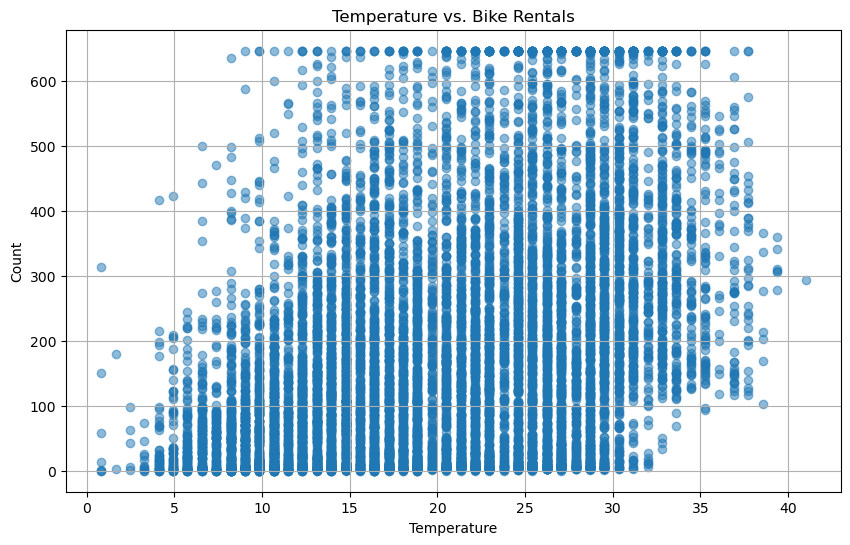

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df["temp"], df["count"], alpha=0.5)
plt.title("Temperature vs. Bike Rentals")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.grid(True)
plt.show()

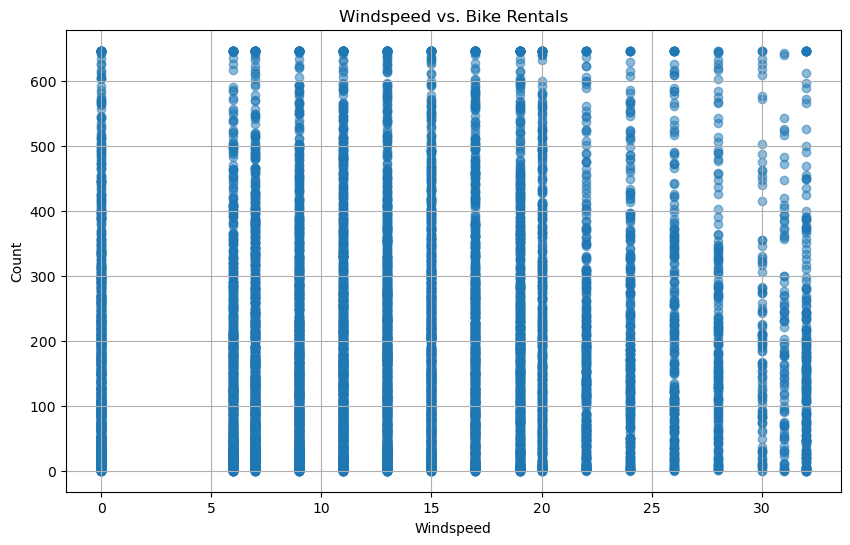

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df["windspeed"], df["count"], alpha=0.5)
plt.title("Windspeed vs. Bike Rentals")
plt.xlabel("Windspeed")
plt.ylabel("Count")
plt.grid(True)
plt.show()

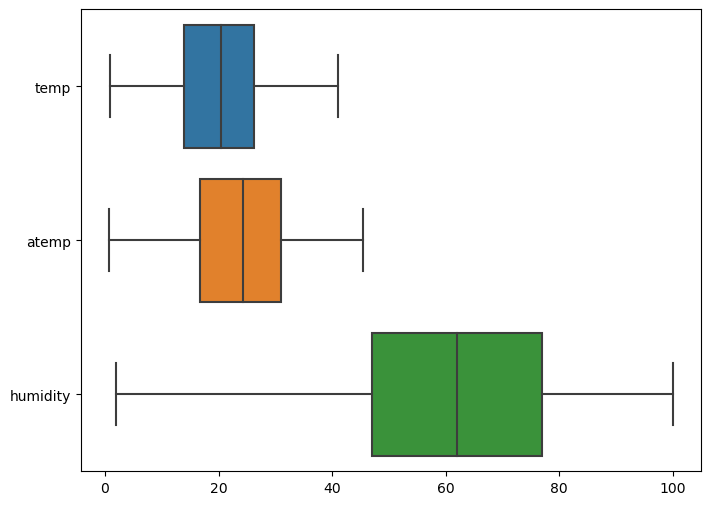

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[["temp","atemp","humidity"]],orient="h")
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  float64
 2   workingday  10886 non-null  float64
 3   weather     10886 non-null  float64
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  float64
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  float64
 9   year        10886 non-null  int32  
 10  month       10886 non-null  int32  
 11  day         10886 non-null  int32  
 12  dayofweek   10886 non-null  int32  
 13  hour        10886 non-null  int32  
 14  count_lag1  10885 non-null  float64
 15  count_lag2  10884 non-null  float64
 16  count_lag3  10883 non-null  float64
 17  count_lag4  10882 non-null  float64
 18  count_lag5  10881 non-null  float64
 19  count_lag6  10880 non-nul

In [34]:
dff = df.drop("datetime", axis=1, inplace=True)

# ENCODİNG

In [35]:
dff = pd.get_dummies(df, columns=["season", "weather"], drop_first= True)

In [36]:
dff

workingday   temp   atemp  humidity  windspeed  count  year  month  \
0             0.0   9.84  14.395      81.0     0.0000   16.0  2011      1   
1             0.0   9.02  13.635      80.0     0.0000   40.0  2011      1   
2             0.0   9.02  13.635      80.0     0.0000   32.0  2011      1   
3             0.0   9.84  14.395      75.0     0.0000   13.0  2011      1   
4             0.0   9.84  14.395      75.0     0.0000    1.0  2011      1   
...           ...    ...     ...       ...        ...    ...   ...    ...   
10881         1.0  15.58  19.695      50.0    26.0027  336.0  2012     12   
10882         1.0  14.76  17.425      57.0    15.0013  241.0  2012     12   
10883         1.0  13.94  15.910      61.0    15.0013  168.0  2012     12   
10884         1.0  13.94  17.425      61.0     6.0032  129.0  2012     12   
10885         1.0  13.12  16.665      66.0     8.9981   88.0  2012     12   

       day  dayofweek  ...  count_lag4  count_lag5  count_lag6  count_lag7  \
0        1          5  ...         NaN         NaN         NaN         NaN   
1        1          5  ...         NaN         NaN         NaN         NaN   
2        1          5  ...         NaN         NaN         NaN         NaN   
3        1          5  ...         NaN         NaN         NaN         NaN   
4        1          5  ...        16.0         NaN         NaN         NaN   
...    ...        ...  ...         ...         ...         ...         ...   
10881   19          2  ...       237.0       218.0       213.0       236.0   
10882   19          2  ...       334.0       237.0       218.0       213.0   
10883   19          2  ...       562.0       334.0       237.0       218.0   
10884   19          2  ...       569.0       562.0       334.0       237.0   
10885   19          2  ...       336.0       569.0       562.0       334.0   

       season_2.0  season_3.0  season_4.0  weather_2.0  weather_3.0  \
0           False       False       False        False        False   
1           False       False       False        False        False   
2           False       False       False        False        False   
3           False       False       False        False        False   
4           False       False       False        False        False   
...           ...         ...         ...          ...          ...   
10881       False       False        True        False        False   
10882       False       False        True        False        False   
10883       False       False        True        False        False   
10884       False       False        True        False        False   
10885       False       False        True        False        False   

       weather_3.5  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
10881        False  
10882        False  
10883        False  
10884        False  
10885        False  

[10886 rows x 24 columns]

# SPLİTİNG

In [37]:
y = dff["count"] 
X = dff.drop("count", axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [38]:
X_train

workingday   temp   atemp  humidity  windspeed  year  month  day  \
9464          1.0  26.24  30.305      65.0    15.0013  2012      9   17   
6917          1.0  18.04  21.970      33.0    22.0028  2012      4    6   
1406          1.0  24.60  31.060      40.0    26.0027  2011      4    4   
2202          1.0  24.60  29.545      73.0    12.9980  2011      5   18   
2669          0.0  27.06  30.305      78.0     8.9981  2011      6   19   
...           ...    ...     ...       ...        ...   ...    ...  ...   
7832          1.0  25.42  31.060      43.0     8.9981  2012      6    6   
9509          1.0  25.42  31.060      38.0    16.9979  2012      9   19   
2283          1.0  24.60  31.060      38.0    23.9994  2011      6    3   
10196         0.0   9.84  12.880      93.0     6.0032  2012     11   10   
8799          1.0  29.52  34.850      74.0    12.9980  2012      8    9   

       dayofweek  hour  ...  count_lag4  count_lag5  count_lag6  count_lag7  \
9464           0    17  ...       343.0       295.0       252.0       202.0   
6917           4    13  ...       376.0       508.0       246.0        80.0   
1406           0    11  ...       157.0        46.0         7.0         2.0   
2202           2    16  ...        54.0        23.0       106.0       202.0   
2669           6     3  ...       150.0       161.0       183.0       188.0   
...          ...   ...  ...         ...         ...         ...         ...   
7832           2    17  ...       303.0       315.0       226.0       203.0   
9509           2    14  ...       192.0       362.0       647.0       545.0   
2283           4     1  ...       248.0       337.0       379.0       525.0   
10196          5     6  ...        44.0        76.0       122.0       162.0   
8799           3     0  ...       500.0       647.0       647.0       647.0   

       season_2.0  season_3.0  season_4.0  weather_2.0  weather_3.0  \
9464        False        True       False         True        False   
6917         True       False       False        False        False   
1406         True       False       False        False        False   
2202         True       False       False        False        False   
2669         True       False       False         True        False   
...           ...         ...         ...          ...          ...   
7832         True       False       False        False        False   
9509        False        True       False        False        False   
2283         True       False       False        False        False   
10196       False       False        True        False        False   
8799        False        True       False        False        False   

       weather_3.5  
9464         False  
6917         False  
1406         False  
2202         False  
2669         False  
...            ...  
7832         False  
9509         False  
2283         False  
10196        False  
8799         False  

[8708 rows x 23 columns]

In [39]:
X_test

workingday   temp   atemp  humidity  windspeed  year  month  day  \
7552         1.0  24.60  30.305      60.0    19.0012  2012      5   14   
1714         0.0  15.58  19.695      46.0    26.0027  2011      4   17   
3866         1.0  22.96  26.515      88.0     0.0000  2011      9   12   
8662         1.0  28.70  33.335      74.0     7.0015  2012      8    3   
3991         0.0  18.86  22.725      77.0    16.9979  2011      9   17   
...          ...    ...     ...       ...        ...   ...    ...  ...   
2595         1.0  23.78  27.275      60.0     0.0000  2011      6   16   
1564         1.0  18.86  22.725      94.0    19.0012  2011      4   11   
1865         1.0  19.68  23.485      51.0    27.9993  2011      5    4   
877          1.0  12.30  13.635      70.0    31.0009  2011      3    1   
990          0.0  19.68  23.485      59.0    23.9994  2011      3    5   

      dayofweek  hour  ...  count_lag4  count_lag5  count_lag6  count_lag7  \
7552          0     1  ...       169.0       230.0       339.0       389.0   
1714          6     8  ...         7.0        25.0        29.0        31.0   
3866          0     2  ...        95.0       159.0       226.0       333.0   
8662          4     7  ...         6.0        14.0        43.0        71.0   
3991          5     8  ...         5.0        28.0        79.0        80.0   
...         ...   ...  ...         ...         ...         ...         ...   
2595          3     1  ...       257.0       330.0       416.0       607.0   
1564          0     1  ...        95.0        92.0       131.0       240.0   
1865          2    15  ...        72.0        31.0        40.0        79.0   
877           1     0  ...        47.0        59.0        88.0       127.0   
990           5    17  ...       190.0       167.0       159.0       103.0   

      season_2.0  season_3.0  season_4.0  weather_2.0  weather_3.0  \
7552        True       False       False         True        False   
1714        True       False       False        False        False   
3866       False        True       False        False        False   
8662       False        True       False        False        False   
3991       False        True       False         True        False   
...          ...         ...         ...          ...          ...   
2595        True       False       False        False        False   
1564        True       False       False        False        False   
1865        True       False       False        False        False   
877        False       False       False        False        False   
990        False       False       False         True        False   

      weather_3.5  
7552        False  
1714        False  
3866        False  
8662        False  
3991        False  
...           ...  
2595        False  
1564        False  
1865        False  
877         False  
990         False  

[2178 rows x 23 columns]

# SCAİLİNG

In [40]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train = pd.DataFrame(X_train)
X_train.columns = dff.drop("count", axis=1).columns

In [42]:
X_train

workingday      temp     atemp  humidity  windspeed      year     month  \
0       0.684084  0.764545  0.779131  0.169179   0.292153  0.998164  0.716132   
1       0.684084 -0.283773 -0.200770 -1.496705   1.185216  0.998164 -0.732704   
2       0.684084  0.554881  0.867892 -1.132293   1.695415 -1.001839 -0.732704   
3       0.684084  0.554881  0.689782  0.585651   0.036625 -1.001839 -0.442936   
4      -1.461810  0.869377  0.779131  0.845945  -0.473574 -1.001839 -0.153169   
...          ...       ...       ...       ...        ...       ...       ...   
8703    0.684084  0.659713  0.867892 -0.976116  -0.473574  0.998164 -0.153169   
8704    0.684084  0.659713  0.867892 -1.236411   0.546825  0.998164  0.716132   
8705    0.684084  0.554881  0.867892 -1.236411   1.439888 -1.001839 -0.153169   
8706   -1.461810 -1.332091 -1.269433  1.626829  -0.855583  0.998164  1.295666   
8707    0.684084  1.183872  1.313462  0.637710   0.036625  0.998164  0.426365   

           day  dayofweek      hour  ...  count_lag4  count_lag5  count_lag6  \
0     1.277354  -1.501386  0.781776  ...    0.893756    0.616141    0.368617   
1    -0.730839   0.493437  0.203209  ...    1.085841    1.857322    0.333635   
2    -1.095965  -1.501386 -0.086074  ...   -0.188902   -0.834817   -1.059831   
3     1.459917  -0.503975  0.637134  ...   -0.788439   -0.968842   -0.482621   
4     1.642480   1.490848 -1.243207  ...   -0.229647   -0.164696   -0.033680   
...        ...        ...       ...  ...         ...         ...         ...   
8703 -0.730839  -0.503975  0.781776  ...    0.660926    0.732684    0.217027   
8704  1.642480  -0.503975  0.347851  ...    0.014824    1.006559    2.671625   
8705 -1.278528   0.493437 -1.532491  ...    0.340786    0.860881    1.109078   
8706 -0.000587   0.992143 -0.809282  ...   -0.846646   -0.660003   -0.389335   
8707 -0.183150  -0.005269 -1.677132  ...    1.807613    2.667294    2.671625   

      count_lag7  season_2.0  season_3.0  season_4.0  weather_2.0  \
0       0.077607   -0.574521    1.719937   -0.580533     1.691638   
1      -0.632099    1.740579   -0.581417   -0.580533    -0.591143   
2      -1.085845    1.740579   -0.581417   -0.580533    -0.591143   
3       0.077607    1.740579   -0.581417   -0.580533    -0.591143   
4      -0.003835    1.740579   -0.581417   -0.580533     1.691638   
...          ...         ...         ...         ...          ...   
8703    0.083424    1.740579   -0.581417   -0.580533    -0.591143   
8704    2.072926   -0.574521    1.719937   -0.580533    -0.591143   
8705    1.956581    1.740579   -0.581417   -0.580533    -0.591143   
8706   -0.155083   -0.574521   -0.581417    1.722556    -0.591143   
8707    2.666287   -0.574521    1.719937   -0.580533    -0.591143   

      weather_3.0  weather_3.5  
0       -0.292198    -0.010717  
1       -0.292198    -0.010717  
2       -0.292198    -0.010717  
3       -0.292198    -0.010717  
4       -0.292198    -0.010717  
...           ...          ...  
8703    -0.292198    -0.010717  
8704    -0.292198    -0.010717  
8705    -0.292198    -0.010717  
8706    -0.292198    -0.010717  
8707    -0.292198    -0.010717  

[8708 rows x 23 columns]

In [43]:
X_test

array([[ 0.68408357,  0.55488133,  0.77913087, ...,  1.6916385 ,
        -0.29219776, -0.01071681],
       [-1.4618097 , -0.5982683 , -0.46822992, ..., -0.59114285,
        -0.29219776, -0.01071681],
       [ 0.68408357,  0.34521776,  0.3335609 , ..., -0.59114285,
        -0.29219776, -0.01071681],
       ...,
       [ 0.68408357, -0.07410938, -0.02265995, ..., -0.59114285,
        -0.29219776, -0.01071681],
       [ 0.68408357, -1.01759544, -1.18067161, ..., -0.59114285,
        -0.29219776, -0.01071681],
       [-1.4618097 , -0.07410938, -0.02265995, ...,  1.6916385 ,
        -0.29219776, -0.01071681]])

# MODEL

# Linear

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [45]:
imputer = SimpleImputer(strategy="mean")
#fillna with mean 

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

y_pred = linear_reg.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions_df.head()

Mean Squared Error: 5858.995447294963
R^2 Score: 0.7944152005980246


Actual   Predicted
7552    11.0   62.754505
1714    43.0   73.239494
3866     2.0   12.258409
8662   421.0  280.963043
3991   108.0   68.898244

# XGBoost

In [46]:
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_reg.fit(X_train_scaled, y_train)

y_pred = xgb_reg.predict(X_train_scaled)


mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


predictions_df = pd.DataFrame({"Actual": y_train, "Predicted": y_pred})
predictions_df.head()

Mean Squared Error: 176.81620845905053
R^2 Score: 0.994110220658472


Actual   Predicted
9464   647.0  656.667969
6917   411.0  389.502228
1406   124.0  113.716919
2202   294.0  272.457184
2669    30.0   44.091469